In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
url = "/content/drive/MyDrive/WA_Fn-UseC_-HR-Employee-Attrition.xlsx"

In [3]:
df = pd.read_excel(url)

In [ ]:
df.head()

In [7]:
df.shape

(1470, 35)

In [8]:
# Check missing values
print(df.isnull().sum())


Age                         0
Attrition                   0
BusinessTravel              0
DailyRate                   0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EmployeeCount               0
EmployeeNumber              0
EnvironmentSatisfaction     0
Gender                      0
HourlyRate                  0
JobInvolvement              0
JobLevel                    0
JobRole                     0
JobSatisfaction             0
MaritalStatus               0
MonthlyIncome               0
MonthlyRate                 0
NumCompaniesWorked          0
Over18                      0
OverTime                    0
PercentSalaryHike           0
PerformanceRating           0
RelationshipSatisfaction    0
StandardHours               0
StockOptionLevel            0
TotalWorkingYears           0
TrainingTimesLastYear       0
WorkLifeBalance             0
YearsAtCompany              0
YearsInCurrentRole          0
YearsSince

In [9]:
# Drop unnecessary columns
df.drop(['EmployeeCount', 'EmployeeNumber', 'Over18', 'StandardHours'], axis=1, inplace=True)

In [10]:
# Handle duplicates
df.drop_duplicates(inplace=True)

In [11]:
# Convert categorical columns to lowercase for consistency
df.columns = df.columns.str.strip().str.replace(' ', '_')

In [12]:
# Convert Yes/No to binary
df['Attrition'] = df['Attrition'].map({'Yes':1, 'No':0})

In [13]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 31 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   int64 
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EnvironmentSatisfaction   1470 non-null   int64 
 9   Gender                    1470 non-null   object
 10  HourlyRate                1470 non-null   int64 
 11  JobInvolvement            1470 non-null   int64 
 12  JobLevel                  1470 non-null   int64 
 13  JobRole                   1470 non-null   object
 14  JobSatisfaction         

In [16]:
df.describe()
df['Attrition'].value_counts(normalize=True)

,proportion
Attrition,
0,0.838776
1,0.161224


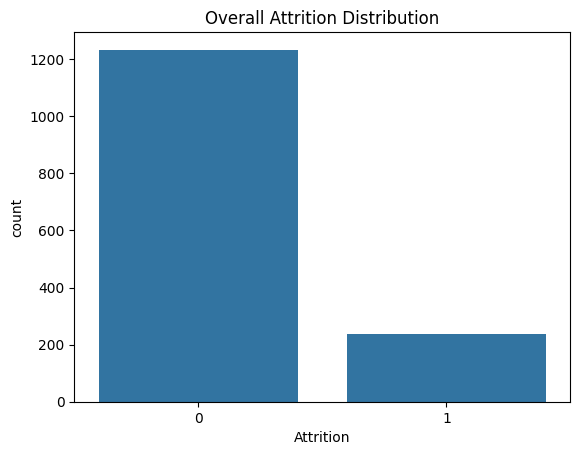

In [17]:
#univariate analysis
sns.countplot(x='Attrition', data=df)
plt.title('Overall Attrition Distribution')
plt.show()


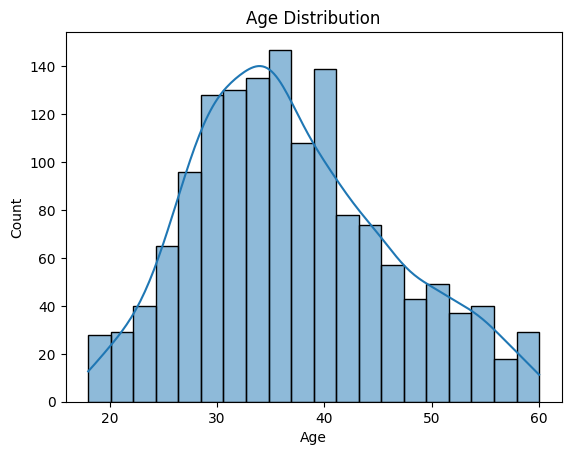

In [18]:
sns.histplot(df['Age'], bins=20, kde=True)
plt.title('Age Distribution')
plt.show()

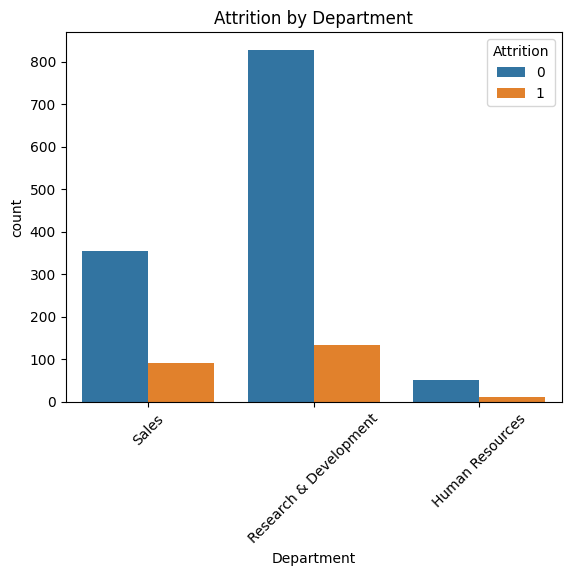

In [19]:
#bivariate analysis
# Attrition vs Department
sns.countplot(x='Department', hue='Attrition', data=df)
plt.title('Attrition by Department')
plt.xticks(rotation=45)
plt.show()

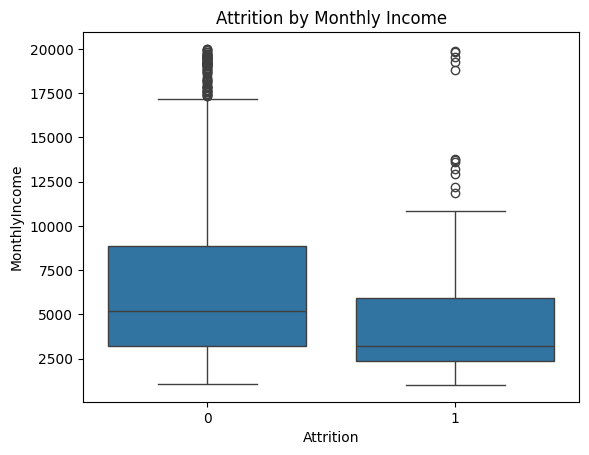

In [20]:
# Attrition vs MonthlyIncome
sns.boxplot(x='Attrition', y='MonthlyIncome', data=df)
plt.title('Attrition by Monthly Income')
plt.show()

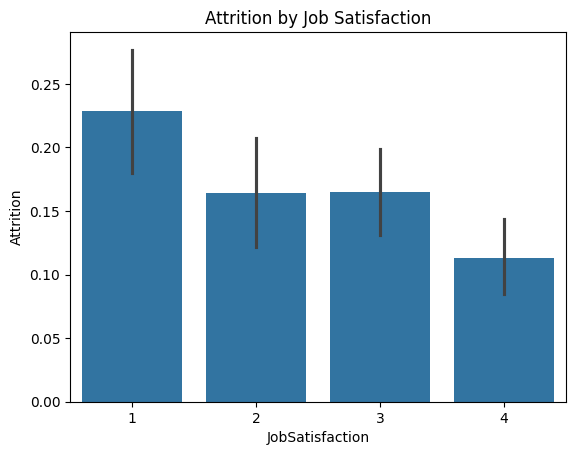

In [21]:
# Attrition vs JobSatisfaction
sns.barplot(x='JobSatisfaction', y='Attrition', data=df)
plt.title('Attrition by Job Satisfaction')
plt.show()

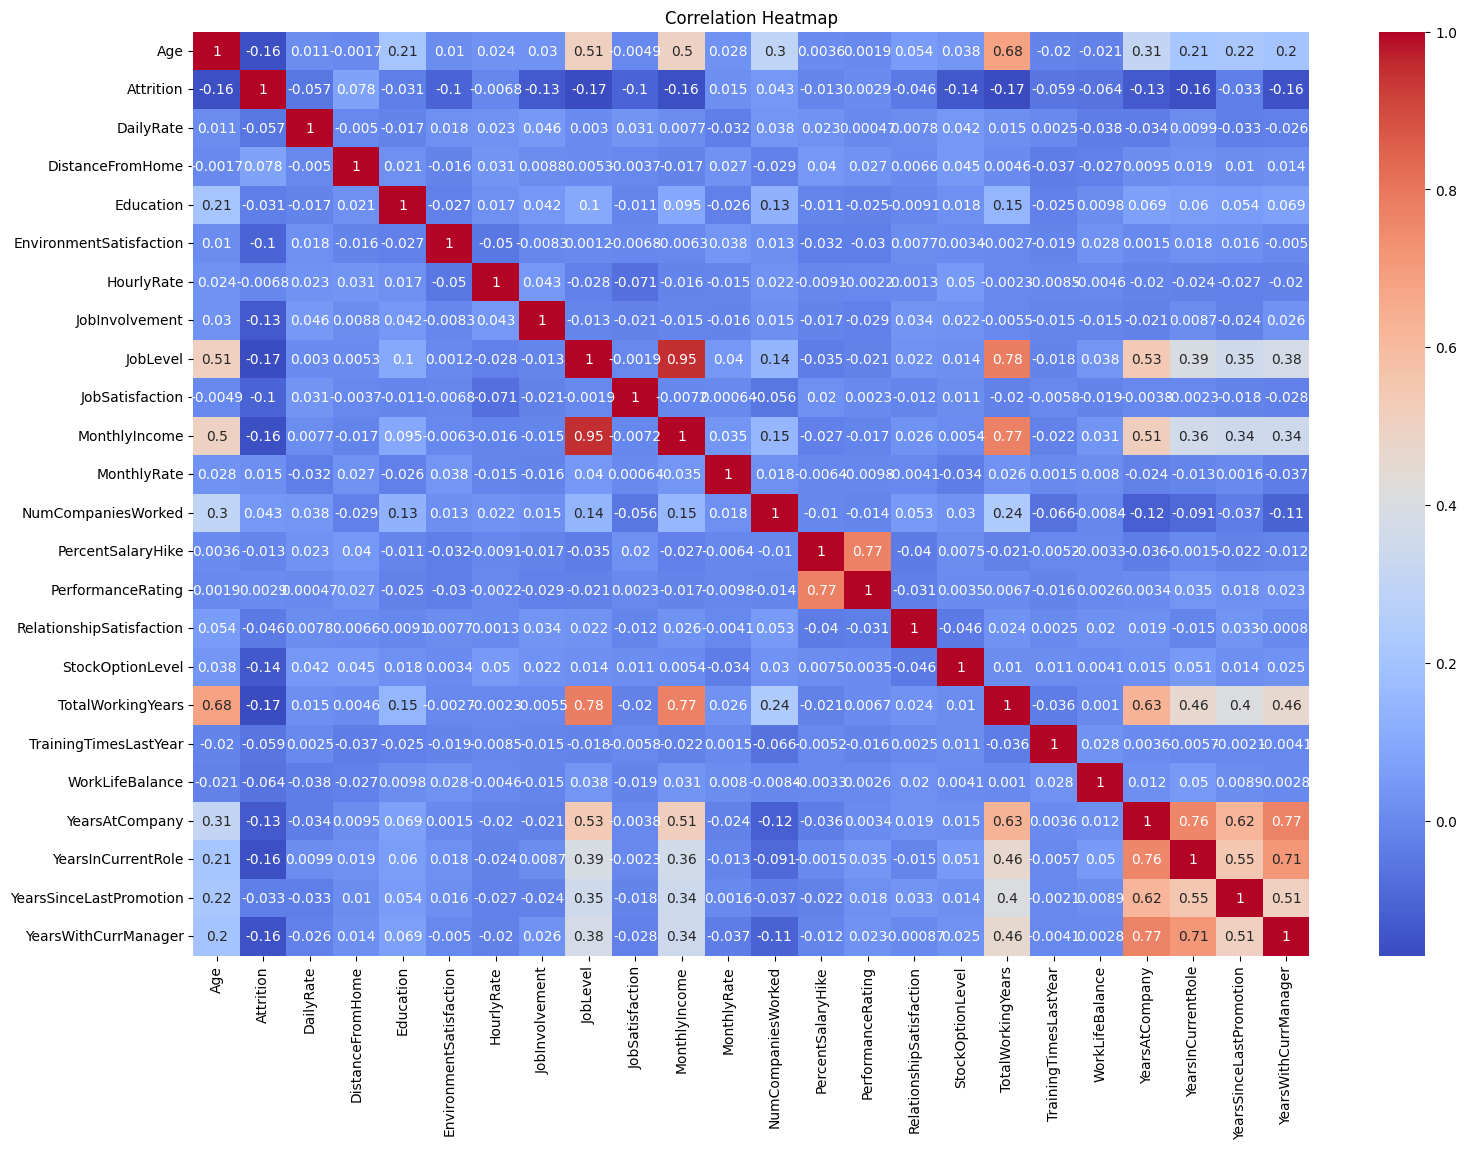

In [31]:
#correlation analysis
plt.figure(figsize=(18,12))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap='coolwarm')
plt.title("Correlation Heatmap")
plt.show()

In [35]:
df.to_csv("HR Employee Attrition Cleaned Data.csv", index=False)

In [37]:
from google.colab import files
files.download('HR Employee Attrition Cleaned Data.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>